# A1.6 Regresión no lineal

1. Se importan los datos del archivo **Tiempo de entrega.csv** al ambiente de trabajo. Se genera una
gráfica de dispersión que muestre el comportamiento de los datos y se agrega una línea de
texto en la que se genere una predicción sobre qué tipo de algoritmo será el más adecuado
para resolver la tarea.

In [1]:
import pandas as pd

# Se leen los datos del dataframe
df = pd.read_csv("/content/sample_data/A1.6 Tiempo de Entrega.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tiempo        432 non-null    float64
 1   Calificacion  430 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.1+ KB
None


Al imprimir información del dataframe se puede observar que la variable **Calificación** es de tipo **object** y que tiene 2 registros no-nulos menos que la variable **Tiempo**, esto quiere decir que hay 2 registros que no tienen un valor válido en la columna de **Calificación**. Para corregir esto, se hace lo siguiente:
- Se convierte toda la columna a numérica (float)
- Se calcula la media de los registros que si tienen una calificación válida.
- Se sustituyen los valores que no son válidos por la media calculada.
- Se eliminan registros residuales nulos que haya habido en la columna de tiempo

In [2]:
# Convertir la columna a numérica, forzando valores no numéricos a NaN
df['Calificacion'] = pd.to_numeric(df['Calificacion'], errors='coerce')

# Calcular la media ignorando NaN
media = df['Calificacion'].mean()

# Reemplazar NaN con la media
df['Calificacion'] = df['Calificacion'].fillna(media)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tiempo        432 non-null    float64
 1   Calificacion  443 non-null    float64
dtypes: float64(2)
memory usage: 7.1 KB
None


Ahora se observan más registros en la variable de **Calificación** que en la de **Tiempo**, esto puede deberse a que hay más registros nulos en la variable de **Tiempo** que no deben de ir, ya que se menciona que la cantidad de registros debe ser de solo 432.

In [4]:
print(df.describe())

            Tiempo  Calificacion
count   432.000000    443.000000
mean     28.861675     94.781795
std     240.305489     23.710566
min    -100.000000      0.000000
25%       1.810486     82.500000
50%       5.424722    110.000000
75%      12.740347    110.000000
max    4960.167000    110.000000


Se eliminan los registros nulos que no deben de existir por parte de la variable **Tiempo**

In [5]:
df = df.dropna(subset=['Tiempo'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 0 to 431
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tiempo        432 non-null    float64
 1   Calificacion  432 non-null    float64
dtypes: float64(2)
memory usage: 10.1 KB
None


Una vez eliminados los registros, se puede observar que ambas variables tienen la misma cantidad de registros. Ahora se puede proceder a graficar **Tiempo vs Calificación**, para ver cual puede ser el mejor modelo.

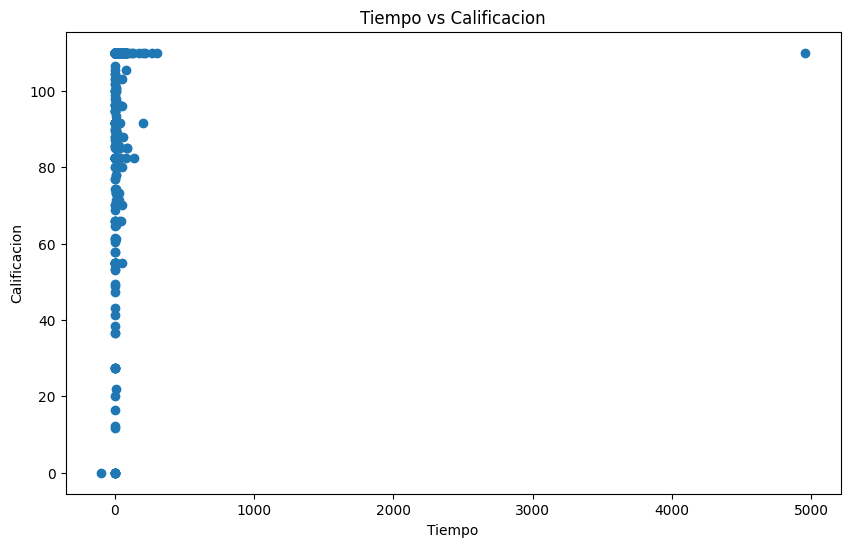

In [6]:
# Importa matplotlib
import matplotlib.pyplot as plt

# Función mágica para graficar en Jupyter Notebook
%matplotlib inline

# Gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df.Tiempo, df.Calificacion)
plt.xlabel("Tiempo")
plt.ylabel("Calificacion")
plt.title("Tiempo vs Calificacion")
plt.show()

De acuerdo a la gráfica, se pueden intentar los siguientes modelos:

<table>
    <thead>
        <tr>
            <td><strong>Modelo</strong></td>
            <td><strong>Aplicación</strong></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Regresión lineal</td>
            <td>No se puede asumir un modelo de regresión lineal debido a que la relación entre el Tiempo y la Calificación no sigue un patrón lineal, por lo tanto no tendría un buen ajuste.</td>
        </tr>
        <tr>
            <td>Regresión polinómica cuadrática</td>
            <td>El patrón de los datos puede representar una curva, lo que un modelo cuadrático podría ajustarse mejor.</td>
        </tr>
        <tr>
            <td>Regresión polinómica de grado 3</td>
            <td>Al igual que la regresión cuadrática, se puede intentar la de grado 3 para ver si se ajusta mejor</td>
        </tr>
        <tr>
            <td>Regresión no lineal</td>
            <td>Probar con modelos de regresión no lineal como KNN</td>
        </tr>
    </tbody>
</table>

2. Se separan los datos en entrenamiento y prueba, con una relación de 70/30. Se imprime en
consola el promedio de los tiempos en el conjunto de entrenamiento y en el conjunto de
prueba. Se hace lo mismo para las calificaciones. Se incluye una línea de texto donde se comenta
sobre la similitud o diferencia de los valores promedio entre el conjunto de entrenamiento
y el de validación, y cómo es que esto podría afectar al análisis.

In [8]:
from sklearn.model_selection import train_test_split

# Se separan los datos en train y test, tanto para X como para Y en una proporción 70 - 30.
X_train, X_test, Y_train, Y_test = train_test_split(df[['Tiempo']], df['Calificacion'], train_size=0.7)

# Se imprime el promedio de los tiempos de los conjuntos de entrenamiento y de prueba
mean_train = X_train['Tiempo'].mean()
mean_test = X_test['Tiempo'].mean()
print(f"Promedio en conjunto de entrenamiento: {mean_train}")
print(f"Promedio en conjunto de prueba: {mean_test}")

Promedio en conjunto de entrenamiento: 32.77831880047351
Promedio en conjunto de prueba: 19.763010683730773


Hay una diferencia de alrededor de 13 puntos entre los conjuntos de entrenamiento y de prueba, esto representa una diferencia significativa entre las partes de entrenamiento y de prueba. Y esto puede afectar al modelo ya que la partición esta sesgada, y se le estaría entrenando con puros datos de entregas tempranas y probando con datos de entregas más tardías, lo que generaría predicciones más imprecisas después.

3. Se entrena un modelo de regresión polinomial usando los datos de entrenamiento. Se imprime un resumen de los resultados obtenidos y se agrega una línea de texto en la que se comenta sobre el tipo de relación (positiva o negativa; ¿a menor tiempo menor calificación?) entre el termino lineal y la respuesta, lo que esto significa y si dicha variable está significativamente asociada con las calificaciones.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Generar polinomiales de grado 2 y ajustar los datos
polyq_train = PolynomialFeatures(degree=2).fit(X_train)
polyq_test = PolynomialFeatures(degree=2).fit(X_test)

# TransformR los datos para que incluyan el polinomial de segundo orden.
Xq_train = pd.DataFrame(polyq_train.transform(X_train))
Xq_test = pd.DataFrame(polyq_test.transform(X_test))

# Generar y entrenar el modelo
mq = sm.OLS(list(Y_train), Xq_train).fit()

# Imprimir resultados
print(mq.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     8.566
Date:                Sat, 15 Feb 2025   Prob (F-statistic):           0.000241
Time:                        04:52:30   Log-Likelihood:                -1385.1
No. Observations:                 302   AIC:                             2776.
Df Residuals:                     299   BIC:                             2787.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             91.4357      1.538     59.446      0.0

De acuerdo a los coeficientes de la columna P>|t| (0.0 y 0.0), la relación entre el tiempo de entrega y la calificación es significativa. Sin embargo, la relación en el término lineal (0.1742) es positiva queriendo decir que entre más tarde se entregue más aumenta la calificación mientras que la relación en el término cuadrático es negativa (-3.438e-05), queriendo decir que hay un punto donde la calificación empieza a bajar. Por lo tanto, la relación es no lineal, ya que inicialmente la curva va aumentando pero después de cierto punto va disminuyendo. También cabe destacar que el tiempo de entrega por si solo no explica bien el comportamiento de las calificaciones, viendose esto reflejado en el valor de la R<sup>2</sup> (0.054) el cual es demasiado bajo (explicando solo el 5.4% del comportamiento).

4. Se entrena un modelo de regresión segmentada, siguiendo la misma estrategia utilizada en
la lectura interactiva, utilizando regresiones cuadráticas para cada segmento. Se generan
estimaciones (predicciones) en los datos de validación. Asegúrate de usar la función
descrita en la lectura interactiva, instalándola en tu ambiente de trabajo en caso de no
haberlo hecho previamente.

- Se instala el paquete **mlinsights** que contiene la función **PiecewiseRegressor** para generar el modelo de **Regresión Segmentada**

In [10]:
!pip install mlinsights

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 48.4 MB/s eta 0:00:00


- Se genera el modelo y se predice el valor de Y en los datos de prueba, así como también se calcula el RSS y el RSE.

In [11]:
# Importar función
from mlinsights.mlmodel import PiecewiseRegressor
import numpy as np

# Generar y entrenar modelo usando el término lineal y el cuadrático
ms = PiecewiseRegressor('bins').fit(Xq_train.iloc[:,1:],Y_train)

# Estimar el valor de Y en los datos de prueba
yHat_ms = ms.predict(Xq_test.iloc[:,1:])

# Calcular RSS
RSS_ms = sum((list(Y_test)-yHat_ms) ** 2)

# Calcular RSE
RSE_ms = np.sqrt(RSS_ms / (len(Y_test) - 1))

# Imprimir resultado en pantalla
print(RSE_ms)

20.53118578417824


- Se genera una gráfica de dispersión que grafica los valores predecidos y los valores reales de (x,y).

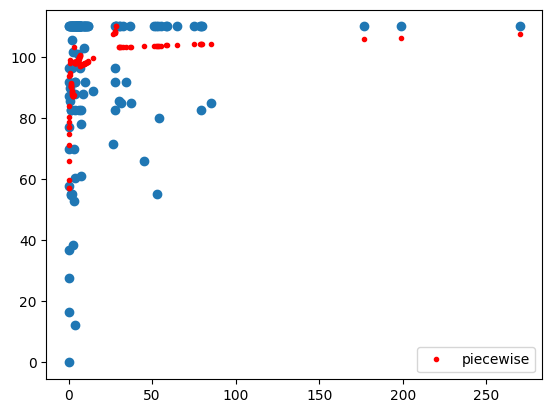

In [12]:
# Gráfica de dispersión con datos reales
plt.scatter(X_test, Y_test)

# Agregar valores estimados por el modelo segmentado como puntos de color rojo
plt.plot(X_test, yHat_ms, "r.", label="piecewise")

# Incluir leyendas
plt.legend()

De acuerdo con el valor del RSE y de la gráfica resultante, el modelo no está prediciendo con gran precisión los valores de las calificaciones, esto debido a que el RSE (la diferencia entre valores reales y predichos) está elevado (**20.53**) y además también se puede apreciar una segmentación muy brusca, con puntos rojos muy agrupados en ciertas secciones y con otros muy lejanos, como viendose afectados por los outliers que se tienen en el conjunto de datos. Esto puede causar predicciones poco flexibles y por ende poco realistas de las calificaciones a futuro.

5. Se entrena un modelo KNN para regresión utilizando el valor de k que se considere adecuado
(probando con varios). Se generan estimaciones en los datos de validación.

In [82]:
from sklearn.neighbors import KNeighborsRegressor as KNN

# Generar y entrenar modelo, se prueba con un valor de 15
mk = KNN(n_neighbors=10).fit(X_train, Y_train)

# Estimar el valor de Y en los datos de prueba
yHat_mk = mk.predict(X_test)

# Calcular RSS
RSS_mk = sum((list(Y_test) - yHat_mk) ** 2)

# Calcular RSE
RSE_mk = np.sqrt(RSS_mk / (len(Y_test) - 1))

# Imprimir resultado en pantalla
print(RSE_mk)

20.176698071181796


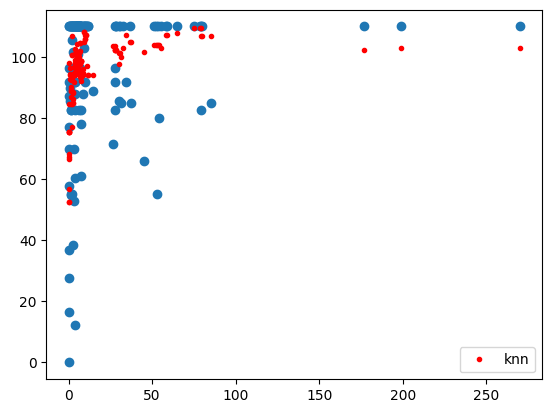

In [83]:
# Gráfica de dispersión con datos reales
plt.scatter(X_test, Y_test)

# Agregar valores estimados por el modelo segmentado como puntos de color rojo
plt.plot(X_test, yHat_mk, "r.", label="knn")

# Incluir leyendas
plt.legend()

Después de probar con un modelo KNN con varios valores, se concluye que k=10 obtuvo el mejor RSE de todos. De acuerdo con el valor del RSE y la gráfica, este modelo tampoco parece ajustarse bien, ya que le valor del RSE también está muy elevado, indicando que hay una alta variablidad entre los valores reales y predichos. La gráfica muestra una alta agrupación de puntos rojos en un solo sector, otras agrupaciones más segmentadas si se aumenta el tiempo, así como valores sueltos tratando de ajustarse a los outliers. Este modelo no parece ajustarse bien y si se usa puede dar predicciones muy poco flexibles e imprecisas.

6. Se imprimen los RSE de los 3 modelos. Se comentan sus diferencias.

- Se calcula el RSE del modelo de regresión polinomial cuadrática.

In [86]:
# Obtener el RSS
RSS = sum(mq.resid ** 2)

# Obtener el número de residuos
df_residuals = mq.df_resid

# Calcular el RSE
RSE_mq = np.sqrt(RSS / df_residuals)

- Se imprimen los RSE de los 3 modelos

In [87]:
print(f"Regresión polinomial cuadrática: {RSE_mq}")
print(f"Regresión segmentada: {RSE_ms}")
print(f"Regresión KNN: {RSE_mk}")

Regresión polinomial cuadrática: 23.870094511957173
Regresión segmentada: 20.53118578417824
Regresión KNN: 20.176698071181796


De acuerdo a los RSE resultantes, se puede apreciar que no tienen mucha diferencia entre sí, sin embargo el de la regresión polinomial cuadrática es el que tiene el valor más alto. La regresión segmentada y KNN tienen valores casi iguales de solo unas decimas de diferencia, siendo el KNN el que tiene el valor más bajo de todos. Sin embargo, puede decirse que ninguno de los 3 modelos se ajusta como debería de ser debido a la alta variabilidad y poca flexibilidad en sus predicciones, especialmente en los últimos 2 modelos probados, que tienen agrupaciones segmentadas de diferente tamaño a medida que avanza el tiempo y valores predichos sueltos que tratan de ajustarse a los outliers cuando en realidad a lo mejor no deberían.

7. Se grafican tanto las calificaciones reales como las predichas por los 3 modelos en un mismo plot.

- Se calcula el yHat del modelo de regresión polinomial cuadrática.

In [90]:
# Calcular yHat en el conjunto de prueba
yHat_mq = mq.predict(Xq_test)

- Se crean las gráficas

Text(0, 0.5, 'Calificación')

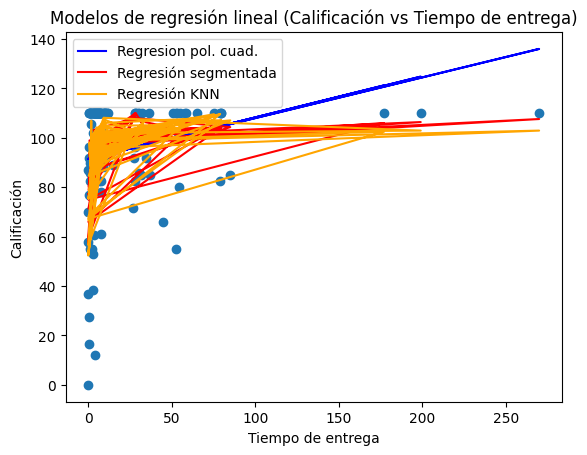

In [92]:
# Gráfica de dispersión con datos reales
plt.scatter(X_test, Y_test)

# Agregar valores estimados por el modelo polinomial cuadrático como puntos de color azul
plt.plot(X_test, yHat_mq, "blue", label="Regresion pol. cuad.")

# Agregar valores estimados por el modelo segmentado como puntos de color rojo
plt.plot(X_test, yHat_ms, "red", label="Regresión segmentada")

# Agregar valores estimados por el modelo KNN como puntos de color naranja
plt.plot(X_test, yHat_mk, "orange", label="Regresión KNN")

# Incluir leyendas, título y nombres en los ejes
plt.legend()
plt.title("Modelos de regresión lineal (Calificación vs Tiempo de entrega)")
plt.xlabel("Tiempo de entrega")
plt.ylabel("Calificación")

- **Nombre**: Humberto Cavazos
- **Matrícula**: 531712